# Modeling: 

## Ridge Regression (L2 Regularization)

![Modeling](https://user-images.githubusercontent.com/67468718/111879997-1bbd6a80-8966-11eb-92c1-01c38cbdbe4a.JPG)



## Contents<a id='Contents'></a>
 * [1. Introduction](#1_Introduction)
 * [2. Sourcing and Loading](#2_Sourcing_and_Loading)
    * [2.1 Import relevant libraries](#2.1_Import_relevant_libraries)
    * [2.2 Load the data](#2.2_Load_the_data)
 * [3. View and Visualize our dependent variable 'price'](#3._View_and_Visualize_our_dependent_variable_price)
    * [3.1 View the data](#3.1_View_the_data)
    * [3.2 Final Visualization of our dependent Variable 'price'](#3.2_Final_Visualization_of_our_dependent_variable_price)
 * [4. Features Selection: Define/Select Features](#4_Features_Selection:_Define/Select_Features)
 * [5. Train/Test Split](#5_Train/Test_Split)
 * [6. Scaling and Transformation: Standardization](#6_Scaling_and_Transformation:_Standardization)
 * [7. Modeling: Ridge Regression (L2 Regularization)](#7_Ridge_Regression_(L2_Regularization))
    * [7.1 Fitting Ridge Regression](#7.1_Fitting_Ridge_Regression)
    * [7.2 Ridge Regression: Coefficients (Before Regularization)](#7.2_Ridge_Regression:_Coefficients_(Before_Regularization))
    * [7.3 Ridge Regression: Residuals Visualization](#7.3_Ridge_Regression:_Residuals_Visualization)
    * [7.4 Ridge Regression Model Evaluation](#7.4_Ridge_Regression_Model_Evaluation)
    * [7.5 Features Selection](#7.5_Features_Selection)
       * [7.5.1 Dropping 'malls' and 'university_count'](#7.5.1_Dropping_malls_university_count)
       * [7.5.2 Features Selection Summary](#7.5.2_Features_Selection_Summary)    
    * [7.6 Regularization II: Ridge](#7.6_Regularization_II:_Ridge)
       * [7.6.1 Fitting Ridge Regression](#7.6.1_Fitting_Ridge_Regression)
       * [7.6.2  Ridge Regression: Coefficients (After Regularization)](#7.6_Ridge_Regression:_Coefficients_(After_Regularization))
       * [7.6.3  Ridge Regression Model Evaluation](#7.6.3_Ridge_Regression_Model_Evaluation)
 * [8. Ridge Regression Tuning Summary](#8_Ridge_Regression_Tuning_Summary)
 * [9. Ridge Regression Actual vs Prediction Visualization](#9_Ridge_Regression_Actual_vs_Prediction_Visualization)
 * [10. Models next step](#10_Models_next_step)

## 1. Introduction<a id='1_Introduction'></a>

Here comes the really fun step: modeling! For this step, we'll be:
 * Training multiple Regression algorithms.
 * Apply hyperparameters tuning where applicable to ensure every algorithm will result in best prediction possible.
 * Finally, evaluate these Models.

**Regression Models:**
 * Linear Regression (Baseline Model).
 * Ridge Regression (L2 Regularization)
 * Lasso Regression (L1 Regularization)
 * Decision Trees
 * Random Forests
 * GB
 * XGBoost
 * Stacking
 * Neural networks.
 
 
 **In This Notebook, We'll be using Ridge Regression (L2 Regularization)**



## 2. Sourcing and Loading<a id='2_Sourcing_and_Loading'></a> 

### 2.1 Import relevant libraries<a id='2.1_Import_relevant_libraries'></a> 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os 

plt.style.use('ggplot')

print('***Libraries are imported***')

***Libraries are imported***


### 2.2 Load the data<a id='2.2_Load_the_data'></a>

In [ ]:
# Check Current Directory:
os.getcwd()

In [5]:
# Changing the directory:
os.chdir(r"path/Feature_Engineering/datasets")

In [ ]:
#Confirm the directory:
os.getcwd()

In [7]:
# List files/folders in the cd:
os.listdir()

['pre_processing_df.csv']

In [8]:
df = pd.read_csv('pre_processing_df.csv')

## 3. View and Visualize our dependent variable 'price'<a id='3._View_and_Visualize_our_dependent_variable_price'></a>

### 3.1 View the data<a id='3.1_View_the_data'></a>

In [9]:
#Let's check the df shape:
structure = df.shape
print("Final DataFrame 'df' has Rows:", structure[0], "and Columns: ", structure[1])

Final DataFrame 'df' has Rows: 7484 and Columns:  23


In [10]:
#Let's check the df shape:
df.head()

,property_type,zipcode,price,beds,baths,sqft,lot_size,days_on_market,price_per_sqft,hoa_month,...,median_income,hotness_score,supply_score,demand_score,university_count,barts,malls,universities,bedBath,AvgRoomSize
0,1,94568,905000,3,4,1994,0,80,454,388.0,...,119637,83.72,94.25,73.19,0,1,0,0,12,284.857
1,2,94566,645000,2,2,1221,1237,143,528,379.0,...,126782,80.07,79.57,80.57,0,0,1,0,4,305.250
2,1,94588,940000,4,2,1928,2660,148,488,470.0,...,134451,85.91,87.06,84.76,0,1,1,0,8,321.333
3,0,94588,1036000,3,2,1355,7708,66,765,33.0,...,134451,85.91,87.06,84.76,0,1,1,0,6,271.000
4,0,94568,1250000,4,4,3083,3058,143,405,232.0,...,119637,83.72,94.25,73.19,0,1,0,0,16,385.375


In [11]:
# Summary Statistics:
df.describe()['price'].round(2)

count       7484.00
mean      887769.19
std       387091.45
min       165000.00
25%       590000.00
50%       808000.00
75%      1150000.00
max      1955000.00
Name: price, dtype: float64

### 3.2 Final Visualization of our dependent Variable 'price'<a id='3.2_Final_Visualization_of_our_dependent_variable_price'></a>

C:\Users\aktha\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


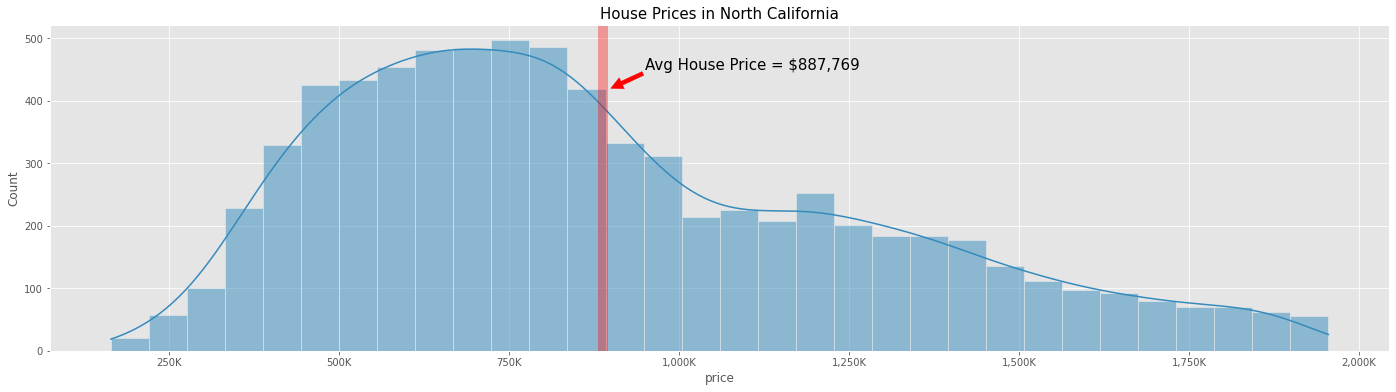

In [12]:
# Making a histogram of the price variable and adding average house sale:
f, ax = plt.subplots(figsize = (24,6))
ax = sns.histplot(x=df['price'], kde=True)
ax.axvline(df['price'].mean(), color='red', ls='-', alpha=0.35, lw=10)
plt.annotate('Avg House Price = $887,769', xy=(900000, 420), xytext=(950000, 450), arrowprops={'color':'red'}, fontsize=15)
ax.set_title('House Prices in North California', fontsize=15)
xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_xticklabels(xlabels)
plt.grid(True)

## 4. Features Selection: Define/Select Features<a id='4_Features_Selection:_Define/Select_Features'></a>


In [13]:
# let's check our final df columns:
df.columns

Index(['property_type', 'zipcode', 'price', 'beds', 'baths', 'sqft',
       'lot_size', 'days_on_market', 'price_per_sqft', 'hoa_month',
       'property_age', 'school_rating', 'school_count', 'median_income',
       'hotness_score', 'supply_score', 'demand_score', 'university_count',
       'barts', 'malls', 'universities', 'bedBath', 'AvgRoomSize'],
      dtype='object')

In [14]:
# Let's define/select our features:
features = ['property_type', 'zipcode', 'beds', 'baths', 'sqft', 'lot_size', 
            'days_on_market', 'price_per_sqft', 'hoa_month', 'property_age', 
            'school_rating', 'school_count', 'median_income', 'hotness_score', 
            'supply_score', 'demand_score', 'university_count', 'barts', 
            'malls', 'universities', 'bedBath', 'AvgRoomSize']

# And, Now let's define X and y:
X = df[features]
y = df.price

## 5. Train/Test Split<a id='5_Train/Test_Split'></a>

Now, let's split our data (X) into training and testing splits, without letting a model learn anything about the test split.

let's have 75/25 Train/Test split

In [15]:
# Import train_test_split
from sklearn.model_selection import train_test_split


# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1981)

## 6. Scaling and Transformation: Standardization<a id='6_Scaling_and_Transformation:_Standardization'></a>

**Standardization** finds the mean of our data and centers the distribution around it, calculating the number of standard deviations away from the mean each point is. The number of standard deviations are then used as our new values. This centers the data around 0 but technically has no limit to the maximum and minimum values.



In [16]:
# Import StandardScaler:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler:
scaler = StandardScaler()

# Fit & transform  scaler to the data:
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))


In [ ]:
# Import StandardScaler:
from sklearn.preprocessing import MinMaxScaler

# Instantiate StandardScaler:
mm_scaler = MinMaxScaler()

# Fit & transform  scaler to the data:
X_train = mm_scaler.fit_transform(X_train.astype(np.float))
X_test = mm_scaler.transform(X_test.astype(np.float))

## 7. Modeling: Ridge Regression (L2 Regularization)<a id='7_Ridge_Regression_(L2_Regularization)'></a>

The first type of regularized regression that we'll train  is called Ridge Regression. in which our loss function is the standard OLS loss function plus the squared value of each coefficient multiplied by some constant alpha. Thus, when minimizing the loss function to fit to our data, models are penalized for coefficients with a large magnitude: large positive and large negative coefficients, that is!.

Note that alpha is a parameter we need to choose in order to fit and predict. Essentially, we can select the alpha for which our model performs best. Picking alpha for ridge regression is similar to picking k in KNN. Before using Ridge regressor it is necessary to scale the inputs, because this model is sensitive to scaling of inputs. So performing the scaling through sklearn’s StandardScalar will be beneficial.

This alpha, which you may also see called lambda in the wild, can be thought of as a parameter that controls model complexity:
 * When alpha is equal to zero, we get back OLS (Linear Regression). Large coefficients in this case are not penalized and the overfitting problem is not accounted for.
 * A very high alpha means that large coefficients are significantly penalized, which can lead to a model that is too simple and ends up underfitting the data. 

### 7.1 Fitting Ridge Regression<a id='7.1_Fitting_Ridge_Regression'></a>


In [17]:
# Import necessary modules
from sklearn.linear_model import Ridge

# Create a ridge regressor: ridge
ridge = Ridge(random_state=1981) # alpha=1 (Default)

# Fit the regressor to the training data
ridge.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R-Squared coefficient : {:.4f}".format(ridge.score(X_test, y_test) * 100), '%')

R-Squared coefficient : 93.4394 %


 R-Squared coefficient is sligthly lower in Ridge Regression (93.4394%) compared to Linear Regression (93.4472%)

In [18]:
# Predict on the test data: y_pred_ridge
y_pred_ridge = ridge.predict(X_test)

### 7.2 Ridge Regression: Coefficients (Before Regularization)<a id='7.2_Ridge_Regression:_Coefficients_(Before_Regularization)'></a>

In [19]:
print("***Ridge Regression - Coefficients***")
print("-------------------------------------")
print(pd.DataFrame(ridge.coef_.round(2), X.columns, columns=['coef']).sort_values(by='coef', ascending=False))

***Ridge Regression - Coefficients***
-------------------------------------
                       coef
price_per_sqft    254845.99
sqft              186103.09
baths             124695.28
beds              124082.28
AvgRoomSize        49640.05
school_rating      26418.52
median_income      24074.52
lot_size           21973.16
hoa_month          15808.70
zipcode            12200.97
universities        9833.84
demand_score        7244.00
property_age        6201.26
barts               5066.52
university_count    1481.96
malls                168.38
days_on_market     -6602.36
hotness_score      -6838.25
supply_score       -7269.07
property_type      -9582.61
school_count      -10035.20
bedBath          -126375.28


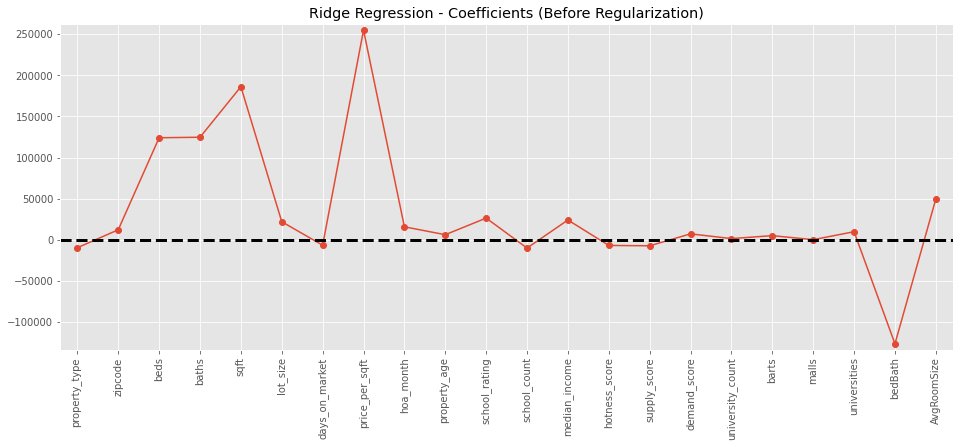

In [20]:
# Plot the coefficients
plt.subplots(figsize = (16,6))
plt.plot(range(len(X.columns)), ridge.coef_, marker='o')
plt.xticks(range(len(X.columns)), X.columns.values, rotation=90)
plt.title("Ridge Regression - Coefficients (Before Regularization)")
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.margins(0.02)
plt.show()

Ridge Regression - Coefficients Summary:

 * As we can see above, Ridge Regression Coefficients are much smaller compared to Linear Regression!!
 * Again, 'university_count' and 'malls' are showing the least Coefficients (Least Important Features).
 * beds, baths, sqft, price_per_sqft and bedbath are the most important features.

### 7.3 Ridge Regression: Residuals Visualization<a id='7.3_Ridge_Regression:_Residuals_Visualization'></a>

C:\Users\aktha\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

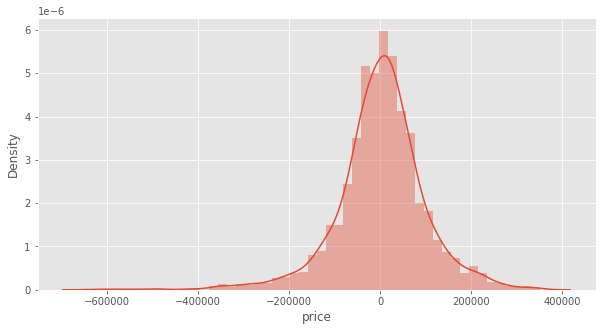

In [21]:
# visualizing residuals
fig = plt.figure(figsize=(10, 5))
residuals = (y_test-y_pred_ridge)
sns.distplot(residuals)

As we can see above by visualizing the residual we can see that is normally distributed which is a good indication that we're having a linear relationship with our dependent variable 'price'.

### 7.4 Ridge Regression Model Evaluation<a id='7.4_Ridge_Regression_Model_Evaluation'></a>

In [22]:
from sklearn import metrics

print("********Ridge Regression Model Evaluation********")
print("-------------------------------------------------")
print("Ridge Regression - r2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_ridge) * 100), '%')
print("-------------------------------------------------")
print("Ridge Regression - MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_ridge)))
print("-------------------------------------------------")
print("Ridge Regression - MSE:{:.4f}".format(metrics.mean_squared_error(y_test, y_pred_ridge)))
print("-------------------------------------------------")
print("Ridge Regression - RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge))))
print("-------------------------------------------------")
print("Ridge Regression - Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_ridge) * 100), '%')
print("-------------------------------------------------")

********Ridge Regression Model Evaluation********
-------------------------------------------------
Ridge Regression - r2 Score: 93.4394 %
-------------------------------------------------
Ridge Regression - MAE: 69557.6932
-------------------------------------------------
Ridge Regression - MSE:9693635442.7628
-------------------------------------------------
Ridge Regression - RMSE:98456.2616
-------------------------------------------------
Ridge Regression - Variance Score:93.4414 %
-------------------------------------------------


As we can see, the value of **root mean squared error (RMSE) is 98,456.2616**, which is slightly larger than 10% of the mean value of the Sales Price i.e.  $887,769.19 also, we have very good variance score at 93.4414%. 

This means that our baseline algorithm **(Tuned Linear Regression: RMSE 98,366.8961 & Variance Score 93.4513%)** is better than Base Ridge Regression.

### 7.5 Features Selection<a id='7.5_Features_Selection'></a>

As shown below let's try if we can improve predictions by dropping features with very low Coefficients:

In [23]:
print("***Ridge Regression - Coefficients***")
print("-------------------------------------")
print(pd.DataFrame(ridge.coef_.round(2), X.columns, columns=['coef']).sort_values(by='coef', ascending=False))

***Ridge Regression - Coefficients***
-------------------------------------
                       coef
price_per_sqft    254845.99
sqft              186103.09
baths             124695.28
beds              124082.28
AvgRoomSize        49640.05
school_rating      26418.52
median_income      24074.52
lot_size           21973.16
hoa_month          15808.70
zipcode            12200.97
universities        9833.84
demand_score        7244.00
property_age        6201.26
barts               5066.52
university_count    1481.96
malls                168.38
days_on_market     -6602.36
hotness_score      -6838.25
supply_score       -7269.07
property_type      -9582.61
school_count      -10035.20
bedBath          -126375.28


In [24]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)


**Dropping Features:**
 * First step let's drop 'malls', 'university_count' the lowest Coefficients.
 * We tried to drop more features but the Model performance degraded so best performance were achived by only dropping above features.
 
 
#### 7.5.1 Dropping 'malls' and 'university_count'<a id='7.5.1_Dropping_malls_university_count'></a> 

In [25]:
# So Now, Let's re define/select our features and keep only high Coefficients:
# let's drop  'malls' and 'university_count':
features = ['property_type', 'zipcode', 'beds', 'baths', 'sqft', 'lot_size', 
            'days_on_market', 'price_per_sqft', 'hoa_month', 'property_age',
            'school_rating', 'school_count', 'median_income', 'hotness_score', 
            'supply_score', 'demand_score', 'barts', 'universities', 'bedBath', 
            'AvgRoomSize']

# And, Now let's define X and y:
X = df[features]
y = df.price

In [26]:
# Import train_test_split
from sklearn.model_selection import train_test_split


# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1981)

In [27]:
# Import StandardScaler:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler:
scaler = StandardScaler()

# Fit & transform  scaler to the data:
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))

In [ ]:
# Import StandardScaler:
from sklearn.preprocessing import MinMaxScaler

# Instantiate StandardScaler:
mm_scaler = MinMaxScaler()

# Fit & transform  scaler to the data:
X_train = mm_scaler.fit_transform(X_train.astype(np.float))
X_test = mm_scaler.transform(X_test.astype(np.float))

In [28]:
# Create a ridge regressor: ridge
ridge_2 = Ridge(random_state=1981) # alpha=1 (Default)

# Fit the regressor to the training data
ridge_2.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R-Squared coefficient Tuned: {:.4f}".format(ridge_2.score(X_test, y_test) * 100), '%')

# Predict on the test data: y_pred_ridge
y_pred_ridge_2 = ridge_2.predict(X_test)

R-Squared coefficient Tuned: 93.4446 %


In [29]:
print("********Tuned Ridge Regression Model Evaluation********")
print("-------------------------------------------------------")
print("Tuned Ridge Regression - r2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_ridge_2) * 100), '%')
print("-------------------------------------------------------")
print("Tuned Ridge Regression - MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_ridge_2)))
print("-------------------------------------------------------")
print("Tuned Ridge Regression - MSE:{:.4f}".format(metrics.mean_squared_error(y_test, y_pred_ridge_2)))
print("-------------------------------------------------------")
print("Tuned Ridge Regression - RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge_2))))
print("-------------------------------------------------------")
print("Tuned Ridge Regression - Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_ridge_2) * 100), '%')
print("-------------------------------------------------------")

********Tuned Ridge Regression Model Evaluation********
-------------------------------------------------------
Tuned Ridge Regression - r2 Score: 93.4446 %
-------------------------------------------------------
Tuned Ridge Regression - MAE: 69518.8784
-------------------------------------------------------
Tuned Ridge Regression - MSE:9685945307.3284
-------------------------------------------------------
Tuned Ridge Regression - RMSE:98417.2003
-------------------------------------------------------
Tuned Ridge Regression - Variance Score:93.4466 %
-------------------------------------------------------


#### 7.5.2 Features Selection Summary<a id='7.5.2_Features_Selection_Summary'></a>

As we can see below, when we're dropping 2 features ('malls', 'university_count'): we're seeing the best Result for Ridge regression. 

|Features Selection| r2 Score|    MAE  | MSE  | RMSE|Variance Score|
|:----------------------|:-------:|:-------:|:----:|:----:|:----:|
|Baseline (all features)|93.4394 %|69557.6932|9693635442.7628|98456.2616|93.4414 %|
|Dropping 2 features    |93.4446 %|69518.8784|9685945307.3284|98417.2003|93.4466 %|

### 7.6 Regularization II: Ridge<a id='7.6_Regularization_II:_Ridge'></a>

In [30]:
# Import necessary modules
from sklearn.model_selection import GridSearchCV

n_alphas = 300
alphas = np.logspace(-5, 4, n_alphas) #let's use linspace from NumPy to control the precise end value

params = {'alpha': alphas }

# Create a ridge regressor: ridge
ridge = Ridge(random_state=1981)

#cross validation
folds = 5

# Setup the GridSearchCV object: ridge_cv
ridge_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, n_jobs=-1,
                        return_train_score=True,
                        verbose = 1)   

# Fit it to the training data
ridge_cv.fit(X_train, y_train) # We'll be using same training data where we dropped 2 features



Fitting 5 folds for each of 300 candidates, totalling 1500 fits


GridSearchCV(cv=5, estimator=Ridge(random_state=1981), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-05, 1.07176689e-05, 1.14868426e-05, 1.23112175e-05,
       1.31947552e-05, 1.41417017e-05, 1.51566076e-05, 1.62443501e-05,
       1.74101565e-05, 1.86596292e-05, 1.99987727e-05, 2.14340223e-05,
       2.29722754e-05, 2.46209240e-05, 2.63878910e-05, 2.82816678e-05,
       3.03113550e-05, 3.248...
       2.67974609e+03, 2.87206312e+03, 3.07818214e+03, 3.29909369e+03,
       3.53585937e+03, 3.78961698e+03, 4.06158599e+03, 4.35307336e+03,
       4.66547988e+03, 5.00030684e+03, 5.35916329e+03, 5.74377375e+03,
       6.15598650e+03, 6.59778248e+03, 7.07128478e+03, 7.57876886e+03,
       8.12267350e+03, 8.70561248e+03, 9.33038717e+03, 1.00000000e+04])},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [31]:
#checking the value of optimum number of parameters
print("Tuned Ridge Regression Parameters: {}".format(ridge_cv.best_params_))
print("Ridge Regression - Best neg_mean_absolute_error is {:.4f}".format(ridge_cv.best_score_ * 100), "%")

Tuned Ridge Regression Parameters: {'alpha': 0.00018374437246107268}
Ridge Regression - Best neg_mean_absolute_error is -7129524.8281 %


In [32]:
cv_results = pd.DataFrame(ridge_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.015618,0.000015,0.0,0.0,1e-05,{'alpha': 1e-05},-71462.711702,-68368.556016,-73180.823635,-71645.833422,...,-71358.110254,1609.553982,78,-71222.101166,-71983.008624,-70707.231340,-68545.260428,-71078.759389,-70707.272189,1158.002584
1,0.006249,0.007653,0.0,0.0,1.07177e-05,{'alpha': 1.0717668854455034e-05},-71461.619286,-68368.666208,-73180.934413,-71643.326216,...,-71357.103962,1609.275533,77,-71221.565924,-71982.310799,-70706.619731,-68543.942135,-71077.928554,-70706.473429,1158.240200
2,0.003124,0.006249,0.0,0.0,1.14868e-05,{'alpha': 1.1486842567375548e-05},-71460.457479,-68368.847750,-73181.052233,-71640.659818,...,-71356.046608,1608.956146,75,-71221.000200,-71981.582696,-70705.984163,-68542.572100,-71077.044878,-70705.636807,1158.484384
3,0.003125,0.006249,0.0,0.0,1.23112e-05,{'alpha': 1.2311217482038896e-05},-71459.222514,-68369.089554,-73181.177477,-71637.843570,...,-71354.936022,1608.599891,73,-71220.447740,-71980.826649,-70705.308546,-68541.115832,-71076.123457,-70704.764445,1158.753394
4,0.006250,0.007655,0.0,0.0,1.31948e-05,{'alpha': 1.3194755216767059e-05},-71457.910515,-68369.346460,-73181.310539,-71634.865157,...,-71353.758832,1608.222712,71,-71219.863147,-71980.096842,-70704.590754,-68539.568768,-71075.174054,-70703.858713,1159.057455


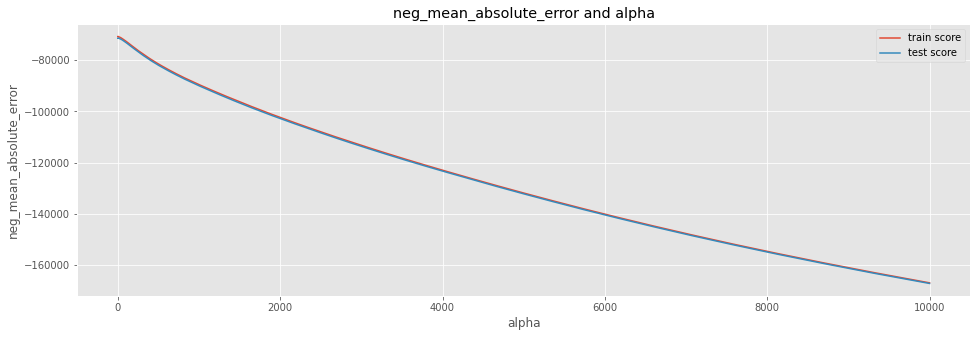

In [33]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting r2 score vs alpha:
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
#plt.axvline(0.001, color='black', ls='--', lw=2, label='Alpha=0.0001')
plt.xlabel('alpha')
plt.ylabel('neg_mean_absolute_error')
plt.title("neg_mean_absolute_error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

#### 7.6.1 Fitting Ridge Regression<a id='7.5.1_Fitting_Ridge_Regression'></a>

In [34]:
# Create a ridge regressor: ridge
alpha = 0.00018374437246107268 # using best Alpha after GridSearchCV
ridge_a = Ridge(alpha=alpha, random_state=1981)

# Fit the regressor to the training data
ridge_a.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R-Squared coefficient Tuned_Alpha : {:.4f}".format(ridge_a.score(X_test, y_test) * 100), '%')


R-Squared coefficient Tuned_Alpha : 93.4576 %


 R-Squared coefficient Tuned_Alpha  is higher in Ridge Regression (93.4576%) compared to Linear Regression (93.4513%)

In [35]:
# Predict on the test data: y_pred_ridge
y_pred_ridge_a = ridge_a.predict(X_test)

#### 7.6.2 Ridge Regression: Coefficients (After Regularization)<a id='7.6.2_Ridge_Regression:_Coefficients_(After_Regularization)'></a>


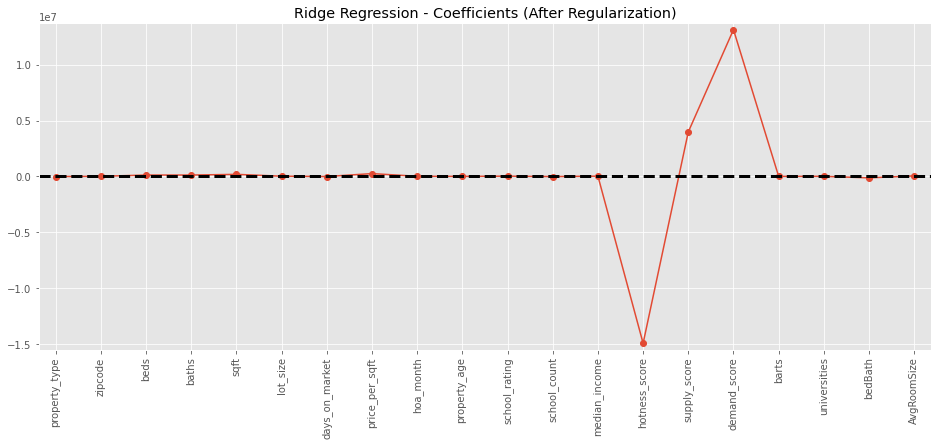

In [36]:
# Plot the coefficients
plt.subplots(figsize = (16,6))
plt.plot(range(len(X.columns)), ridge_a.coef_, marker='o')
plt.xticks(range(len(X.columns)), X.columns.values, rotation=90)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.margins(0.02)
plt.title("Ridge Regression - Coefficients (After Regularization)")
plt.show()

#### 7.6.3 Ridge Regression Model Evaluation<a id='7.6.3_Ridge_Regression_Model_Evaluation'></a>

In [37]:
print("********Tuned_Alpha Ridge Regression Model Evaluation********")
print("-------------------------------------------------------------")
print("Tuned_Alpha Ridge Regression - r2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_ridge_a) * 100), '%')
print("-------------------------------------------------------------")
print("Tuned_Alpha Ridge Regression - MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_ridge_a)))
print("-------------------------------------------------------------")
print("Tuned_Alpha Ridge Regression - MSE:{:.4f}".format(metrics.mean_squared_error(y_test, y_pred_ridge_a)))
print("-------------------------------------------------------------")
print("Tuned_Alpha Ridge Regression - RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge_a))))
print("-------------------------------------------------------------")
print("Tuned_Alpha Ridge Regression - Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_ridge_a) * 100), '%')
print("-------------------------------------------------------------")

********Tuned_Alpha Ridge Regression Model Evaluation********
-------------------------------------------------------------
Tuned_Alpha Ridge Regression - r2 Score: 93.4576 %
-------------------------------------------------------------
Tuned_Alpha Ridge Regression - MAE: 69427.9988
-------------------------------------------------------------
Tuned_Alpha Ridge Regression - MSE:9666812279.1121
-------------------------------------------------------------
Tuned_Alpha Ridge Regression - RMSE:98319.9485
-------------------------------------------------------------
Tuned_Alpha Ridge Regression - Variance Score:93.4594 %
-------------------------------------------------------------


As we can see, the value of **root mean squared error (RMSE) is 98,319.9485**, which is slightly larger than 10% of the mean value of the Sales Price i.e.  $887,769.19. also, we have **very good variance score at 93.4594%.** This means that Ridge algorithm is slightly better than **Linear Regression: RMSE 98,366.8961 & Variance Score 93.4530%.**


## 8. Ridge Regression Tuning Summary<a id='8_Ridge_Regression_Tuning_Summary'></a>

As we can see below, We managed to improve our Ridge Regression Model by:
 * Dropping 2 features ('malls', 'university_count'), and
 * Using Regularization to determine best Alpha=0.00018374437246107268
 * Variance Score has improved from 93.4414 % (Ridge - baseline) to 93.4594 %

|Model Tuning| r2 Score|    MAE  | MSE  | RMSE|Variance Score|
|:----------------------|:-------:|:-------:|:----:|:----:|:----:|
|Baseline (all features + Alpha=1 (Default))|93.4394 %|69557.6932|9693635442.7628|98456.2616|93.4414 %|
|Dropping 2 features    |93.4446 %|69518.8784|9685945307.3284|98417.2003|93.4466 %|
|Dropping 2 features + Regularization II (Alpha =0.00018374437246107268)  |93.4576 %|69427.9988|9666812279.1121|98319.9485|93.4594 %|

## 9. Ridge Regression Actual vs Prediction Visualization<a id='9_Ridge_Regression_Actual_vs_Prediction_Visualization'></a>

Text(0, 0.5, 'Prediction')

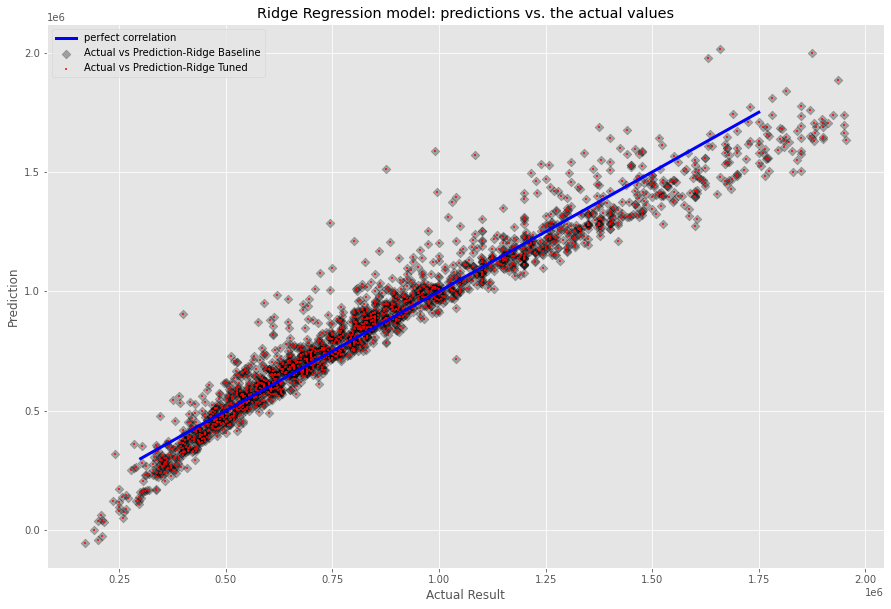

In [38]:
# Let's plot the predictions against the actual result. Use scatter()
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred_ridge_a, color='black', marker='D', s=40, alpha=0.3, label='Actual vs Prediction-Ridge Baseline')
plt.scatter(y_test,y_pred_ridge_a, color='red', marker='+', s=5, alpha=0.75,label='Actual vs Prediction-Ridge Tuned')
plt.title('Ridge Regression model: predictions vs. the actual values')

# Add a line for perfect correlation
plt.plot([300000,1750000],[300000,1750000],color = 'blue', linewidth=3, label='perfect correlation')
plt.legend()
plt.xlabel('Actual Result')
plt.ylabel('Prediction')

In [39]:
final_ridge = pd.DataFrame({'SalePrice_Actual': y_test, 'SalePrice_Predicted_baseline': y_pred_ridge.round(3), 'SalePrice_Predicted_Tuned': y_pred_ridge_a.round(3)})
final_ridge.head(10).sort_values(by='SalePrice_Actual', ascending=False)

,SalePrice_Actual,SalePrice_Predicted_baseline,SalePrice_Predicted_Tuned
696,1770000,1693595.765,1687113.630
4489,850000,906260.882,912345.871
7400,825000,866842.791,865282.727
3136,821000,753845.650,751584.561
5011,820000,890600.418,888551.259
535,750000,1098971.570,1097409.895
4969,705000,882411.088,879970.821
4768,525000,534327.254,532372.917
4032,525000,562615.576,566468.964
5130,505000,565689.776,564358.870


## 10. Models next step:<a id='10_Models_next_step'></a>

Now, after building our 2nd Model: Ridge Regression, let's see if we can further improve our prediction using below algorithm:

 * Lasso Regression (L1 Regularization)
 

## 9. Saving our Data<a id='9_Saving_our_data'></a>
Finally, let's save our final DataFrame with the new features:


In [ ]:
# Saving df_final_v1:
df_final_v1.to_csv(path_or_buf = "path" + "/pre_processing_df.csv", index=False)

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))